---
<span style="font-size:3em;">**Visualisation of the brain imaging results**</span>

---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Domain-general-inhibition-induced-activations" data-toc-modified-id="Domain-general-inhibition-induced-activations-1">Domain-general inhibition-induced activations</a></span><ul class="toc-item"><li><span><a href="#Figure-3-top,-Display-on-MNI-152-surface" data-toc-modified-id="Figure-3-top,-Display-on-MNI-152-surface-1.1">Figure 3 top, Display on MNI-152 surface</a></span><ul class="toc-item"><li><span><a href="#Define-paths-and-variables" data-toc-modified-id="Define-paths-and-variables-1.1.1">Define paths and variables</a></span></li><li><span><a href="#Display" data-toc-modified-id="Display-1.1.2">Display</a></span></li></ul></li><li><span><a href="#Figure-3-bottom,-Display-on-MNI-152-volume" data-toc-modified-id="Figure-3-bottom,-Display-on-MNI-152-volume-1.2">Figure 3 bottom, Display on MNI-152 volume</a></span><ul class="toc-item"><li><span><a href="#Define-paths-and-variables" data-toc-modified-id="Define-paths-and-variables-1.2.1">Define paths and variables</a></span></li><li><span><a href="#Display" data-toc-modified-id="Display-1.2.2">Display</a></span></li></ul></li></ul></li><li><span><a href="#Domain-general-brain/behaviour-relationships-(PLS)" data-toc-modified-id="Domain-general-brain/behaviour-relationships-(PLS)-2">Domain-general brain/behaviour relationships (PLS)</a></span></li></ul></div>

In [2]:
# ----------------------------------------------------------------------
# Dace Apšvalka @MRC-CBU, 2019-2021
# ----------------------------------------------------------------------

import os

##################################################################
# Using PySurfer for displaying on the surface
# https://pysurfer.github.io/
##################################################################
from surfer import Brain

##################################################################
# Using nilearn for displaying on T1 volume
# https://nilearn.github.io/stable/index.html
##################################################################
from nilearn import plotting, image
from nilearn.image import concat_imgs, index_img
from nilearn.plotting import plot_prob_atlas

##################################################################
# Path to files
##################################################################
# The files can be downloaded from https://github.com/dcdace/Domain-general/tree/master/data/imaging_files
rootPath = r"D:\ownCloud\ownCloud\other\Supramodal\paper\sharing\gitHub\Domain-general\data\imaging_files"

##################################################################
# MNI-152 T1 volume image
# using FSL MNI-152 T1 as a base image
##################################################################
t1 = os.path.join(rootPath, "fsl_MNI152_T1_1mm_brain.nii.gz")

##################################################################
# MNI-152 surface
# The MNI-152 surface was created using Freesurfer. Using the default fsaverage was not optimal as the univariate 
# analysis was done using MNI-152 template. For better accuracy, therefore, we created a freesurfer 'subject' mni152 
# and are using it to display our results.
##################################################################
os.environ["SUBJECTS_DIR"] = rootPath

# Domain-general inhibition-induced activations

**Red:** within-subjects (N = 24) conjunction of the Stop > Go and the No-Think > Think contrasts thresholded at p < 0.05 FDR corrected for whole-brain multiple comparisons. 

**Blue:** meta-analytic conjunction of Stop > Go and the No-Think > Think contrasts from independent 40 Stop-signal and 16 Think/No-Think studies. 

**Yellow:** overlap of the within-subjects and meta-analytic conjunctions. 

Results are displayed on an inflated **MNI-152** surface with outlined and numbered Brodmann areas (top panel), as well as on MNI-152 volume slices (bottom panel). 

The brain images were generated using FreeSurfer software (http://surfer.nmr.mgh.harvard.edu), and PySurfer (https://pysurfer.github.io) and Nilearn (https://nilearn.github.io) Python (Python Software Foundation, DE, USA) packages. 

## Figure 3 top, Display on MNI-152 surface

### Define paths and variables

In [10]:
##################################################################
# No-Think>Think & Stop>Go conjunction map label files.
# Label files were created in Freesurfer
##################################################################
# within-subject conjunction map
wConj_left   = os.path.join(rootPath, 'within_NTT_SG_conjunction_lh.label')
wConj_right  = os.path.join(rootPath, 'within_NTT_SG_conjunction_rh.label')
wColor = "red"
# meta-analytic conjunction map
mConj_left   = os.path.join(rootPath, 'meta_NTT_SG_conjunction_lh.label')
mConj_right  = os.path.join(rootPath, 'meta_NTT_SG_conjunction_rh.label')
mColor = "blue"
# conjunction of the within- and meta- conjunction maps
wmConj_left  = os.path.join(rootPath, 'within_meta_conjunction_lh.label')
wmConj_right = os.path.join(rootPath, 'within_meta_conjunction_rh.label')
wmColor = "yellow"
##################################################################
labelAlpha = 1
annotAlpha = .6

##############################################################
# To show in 3D in a separate window, use this below
##############################################################
#import mayavi.mlab as MM
#%gui qt

##############################################################
# To show inline, use this below
# https://gist.github.com/KristoforMaynard/e41abdd59c5308eacf84#file-imayavi-py
# Download and put it in ..\Anaconda3\Lib\site-packages\IPython\extensions
# or in alternative location if not using anaconda
##############################################################
%load_ext imayavi

The imayavi extension is already loaded. To reload it, use:
  %reload_ext imayavi


### Display

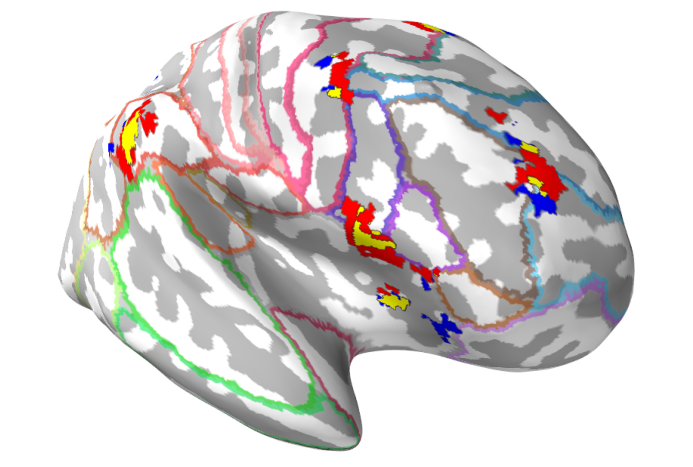

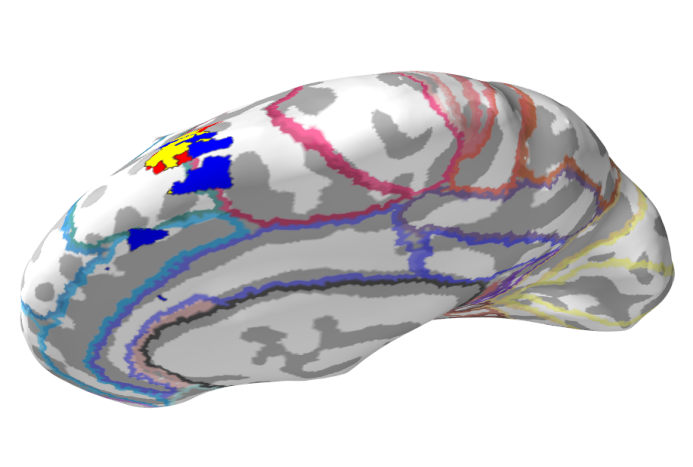

In [14]:
# RIGHT lateral with annotations
brain = Brain("mni152", "rh", "inflated", background="white", cortex=['white', (0.7,0.7,0.7)], size=(1300,1000))
annot_path = os.path.join(os.environ["SUBJECTS_DIR"], "mni152", "label", "rh.PALS_B12_Brodmann.annot")
brain.add_annotation(annot_path, hemi='rh', borders=True, alpha = annotAlpha)
brain.add_label(wConj_right, color = wColor, alpha = labelAlpha, hemi = "rh")
brain.add_label(mConj_right, color = mColor, alpha = labelAlpha, hemi = "rh")
brain.add_label(wmConj_right, color = wmColor, alpha = labelAlpha, hemi = "rh")
brain.show_view(dict(azimuth=30, distance=320, focalpoint=[0, 30, -8]))

##############################################################
# On some systems there is some mayavi rendering issue. 
# This fix solves it: https://github.com/nipy/PySurfer/issues/299#issuecomment-796999952
n_children = len(brain.brain_matrix[0][0]._f.children)
for idx in range(1, n_children):
    (brain.brain_matrix[0][0]._f.children[idx].children[0].children[0]
     .children[0].actor.actor.force_opaque) = True
##############################################################
imayavi_show_inline(size=(900, 600))

# RIGHT Medial with annotations
brain = Brain("mni152", "rh", "inflated", background="white", cortex=['white', (0.7,0.7,0.7)], size=(1300,900))
annot_path = os.path.join(os.environ["SUBJECTS_DIR"], "mni152", "label", "rh.PALS_B12_Brodmann.annot")
brain.add_annotation(annot_path, hemi='rh', borders=True, alpha = annotAlpha)
brain.add_label(wConj_right, color = wColor, alpha = labelAlpha, hemi = "rh")
brain.add_label(mConj_right, color = mColor, alpha = labelAlpha, hemi = "rh")
brain.add_label(wmConj_right, color = wmColor, alpha = labelAlpha, hemi = "rh")
brain.show_view(dict(azimuth=-5, distance=340, elevation = -45, focalpoint=[0, 1.5, 0]))

##############################################################
# On some systems there is some mayavi rendering issue. 
# This fix solves it: https://github.com/nipy/PySurfer/issues/299#issuecomment-796999952
n_children = len(brain.brain_matrix[0][0]._f.children)
for idx in range(1, n_children):
    (brain.brain_matrix[0][0]._f.children[idx].children[0].children[0]
     .children[0].actor.actor.force_opaque) = True
##############################################################
imayavi_show_inline(size=(900, 600))

## Figure 3 bottom, Display on MNI-152 volume

### Define paths and variables

In [11]:
##################################################################
# No-Think>Think & Stop>Go conjunction map files
##################################################################
# within-subject conjunction map
wConj    = os.path.join(rootPath, "within_NTT_SG_conjunction.nii")
# meta-analytic conjunction map
mConj    = os.path.join(rootPath, "meta_NTT_SG_conjunction.nii")
# conjunction of the within- and meta- conjunction maps
wmConj   = os.path.join(rootPath, "within_meta_conjunction.nii")
##################################################################

### Display

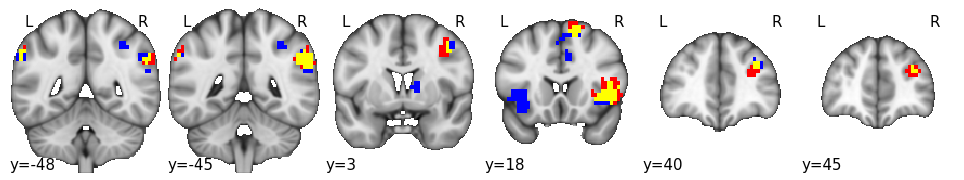

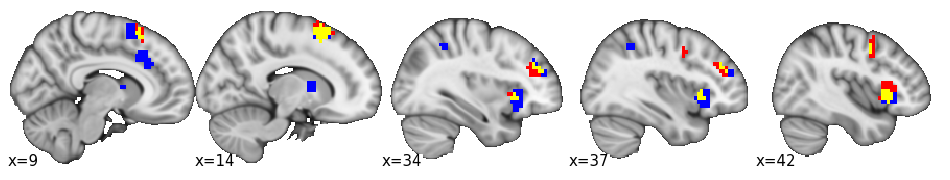

In [13]:
##################################################################
# Display maps on the base T1 image
##################################################################
# First, display within-subject conjunction on the base T1
# within- map is in Red 
conj_maps = plotting.plot_roi(bg_img = t1, roi_img = wConj,                          
                          display_mode = 'y', # coronal display
                          cut_coords = [-48, -45, 3, 18, 40, 45], # which slices
                          dim = -0.3, # makes the bg t1 darker than by default
                          cmap = plotting.cm.alpha_cmap('red', alpha_min=1, alpha_max=1),
                          black_bg = False, annotate = True, draw_cross = False)
# add wConj on top again to make it brighter
conj_maps.add_overlay(wConj, cmap = plotting.cm.alpha_cmap('red', alpha_min=1, alpha_max=1))
# add mConj in Blue
conj_maps.add_overlay(mConj, cmap = plotting.cm.alpha_cmap('blue', alpha_min=1, alpha_max=1))
# add wmConj in Yellow
conj_maps.add_overlay(wmConj, cmap = plotting.cm.alpha_cmap('yellow', alpha_min=1, alpha_max=1))
# annotation size
conj_maps.annotate(size=15)

##################################################################
# Same as above but saggital slices
conj_maps = plotting.plot_roi(bg_img = t1, roi_img = wConj,                          
                          display_mode = 'x', # coronal display
                          cut_coords = [9,14,34,37,42], # which slices
                          dim = -0.3, # makes the bg t1 darker than by default
                          cmap = plotting.cm.alpha_cmap('red', alpha_min=1, alpha_max=1),
                          black_bg = False, annotate = True, draw_cross = False)
# add wConj on top again to make it brighter
conj_maps.add_overlay(wConj, cmap = plotting.cm.alpha_cmap('red', alpha_min=1, alpha_max=1))
# add mConj in Blue
conj_maps.add_overlay(mConj, cmap = plotting.cm.alpha_cmap('blue', alpha_min=1, alpha_max=1))
# add wmConj in Yellow
conj_maps.add_overlay(wmConj, cmap = plotting.cm.alpha_cmap('yellow', alpha_min=1, alpha_max=1))
# annotation size
conj_maps.annotate(size=15)

# Domain-general brain/behaviour relationships (PLS)

The voxel salience map expressing LV1. 

**Blue:** meta-analytic conjunction mask. 

**Red:** voxels showing a significant pattern of brain/behaviour correlations as revealed by the LV1; thresholded at bootstrapped standard ratio 1.96, corresponding to p < 0.05, two-tailed. 

Results are displayed on an inflated **MNI-152** surface (top panel), as well as on MNI-152 volume slices (bottom panel). 

The brain images were generated using FreeSurfer software (http://surfer.nmr.mgh.harvard.edu), and PySurfer (https://pysurfer.github.io) and Nilearn (https://nilearn.github.io) Python (Python Software Foundation, DE, USA) packages.

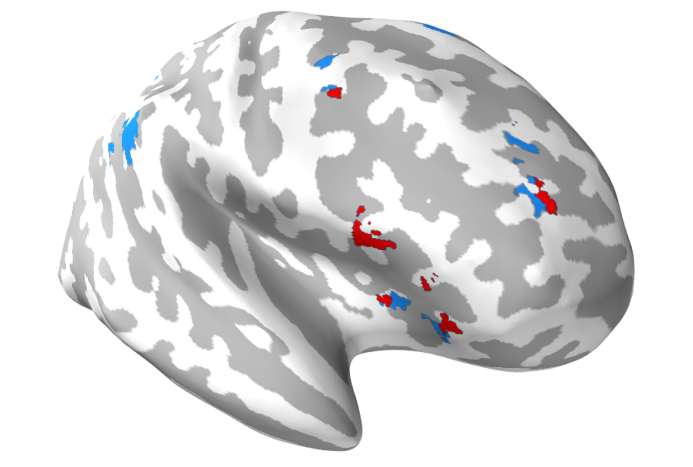

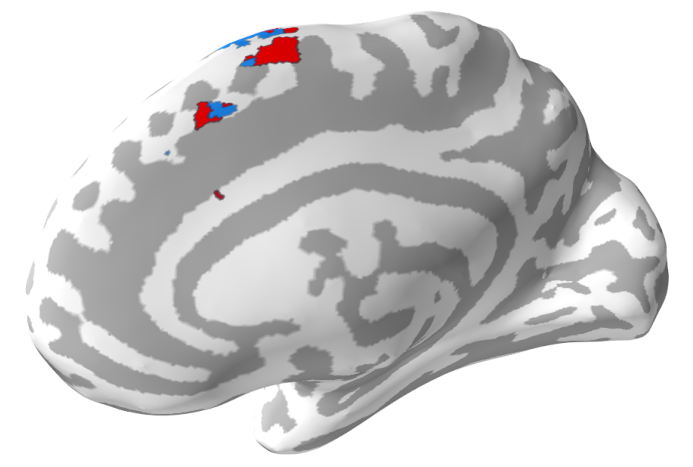

In [21]:
pls_left  = os.path.join(rootPath, 'PLS_results_lh.label')
pls_right = os.path.join(rootPath, 'PLS_results_rh.label')

mConj_left  = os.path.join(rootPath, 'meta_NTT_SG_conjunction_lh.labell')
mConj_right = os.path.join(rootPath, 'meta_NTT_SG_conjunction_rh.label')

# RIGHT lateral
brain = Brain("mni152", "rh", "inflated", background="white", cortex=['white', (0.7,0.7,0.7)], size=(1300,1000))
brain.add_label(mConj_right,   color = "dodgerblue",     alpha = 1, hemi = "rh")
brain.add_label(pls_right,   color = "red", alpha = 1, hemi = "rh")
brain.show_view(dict(azimuth=30, distance=320, focalpoint=[0, 30, -8]))
##############################################################
# On some systems there is some mayavi rendering issue. 
# This fix solves it: https://github.com/nipy/PySurfer/issues/299#issuecomment-796999952
n_children = len(brain.brain_matrix[0][0]._f.children)
for idx in range(1, n_children):
    (brain.brain_matrix[0][0]._f.children[idx].children[0].children[0]
     .children[0].actor.actor.force_opaque) = True
##############################################################
imayavi_show_inline(size=(900, 600))

# RIGHT medial
brain = Brain("mni152", "rh", "inflated", background="white", cortex=['white', (0.7,0.7,0.7)], size=(1300,900))
brain.add_label(mConj_right,   color = "dodgerblue",     alpha = 1, hemi = "rh")
brain.add_label(pls_right,   color = "red", alpha = 1, hemi = "rh")
brain.show_view(dict(azimuth=160, distance=340, focalpoint=[0, 10, 2]))
##############################################################
# On some systems there is some mayavi rendering issue. 
# This fix solves it: https://github.com/nipy/PySurfer/issues/299#issuecomment-796999952
n_children = len(brain.brain_matrix[0][0]._f.children)
for idx in range(1, n_children):
    (brain.brain_matrix[0][0]._f.children[idx].children[0].children[0]
     .children[0].actor.actor.force_opaque) = True
##############################################################
imayavi_show_inline(size=(900, 600))

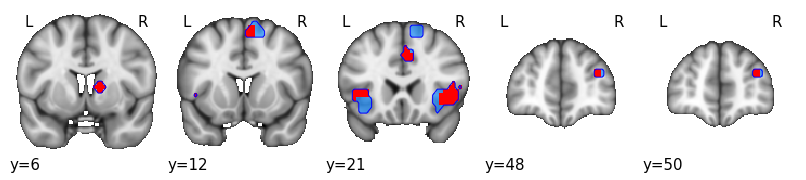

In [22]:
mConj = os.path.join(rootPath, "meta_NTT_SG_conjunction.nii")
pls   = os.path.join(rootPath, "PLS_results.nii")


plsMaps = plotting.plot_roi(mConj,
                          t1, 
                          cut_coords = [6,12,21,48,50], 
                          display_mode='y', 
                          dim = -0.3,
                          black_bg = False,
                          cmap = plotting.cm.alpha_cmap('dodgerblue', alpha_min=1, alpha_max=1),
                          annotate = True,
                          draw_cross = False)

plsMaps.add_contours(mConj, linewidths=1, levels=[0.5], colors='blue')
plsMaps.add_overlay(pls, 
                  cmap = plotting.cm.alpha_cmap('red', alpha_min=1, alpha_max=1))

plsMaps.annotate(size=15)
